# <b>Report: Analyze different weather conditions and their impact on different types of vehicles involved in road accidents</b>

## <b>Contents:</b>
<hr>
<ol>
    <li>Introduction</li>
    <li>Methods</li>
        <ol>
            <li>Dataset 1: Traffic Dataset</li>
            <li>Dataset 2: Weather Dataset</li>
            <li>Data Pipeline</li>
        </ol>
    <li>Dataset Loading</li>
    <li>Results</li>
        <ol>
            <li>Which road condition has the most impact on road accidents?</li>
            <li>Which type of vehicle is most likely to be involved in an accident?</li>
            <li>How do different weather conditions impact the types of vehicles involved in accidents?</li>
            <li>Is there any trend in vehicle accidents over the period of a year?</li>
        </ol>
    <li>Conclusion</li>
    <li>Limitations</li>
</ol>

## <b>1. Introduction</b>
<hr>
Road accidents pose significant threats to public safety. Understanding the factors influencing the types of vehicles involved in accidents is crucial for developing effective safety measures. One such factor of interest is weather conditions. This study aims to investigate whether weather has an impact on the types of vehicles involved in road accidents.

Accurate insights into the relationship between weather, road conditions, and accident outcomes can inform targeted interventions and improve overall road safety. Identifying patterns in vehicle involvement under different weather conditions contributes to a more comprehensive understanding of road safety dynamics.

## <b>2. Methods</b>
<hr>
There are two primary datasets that were utilized in this study. The first dataset contains road accident data in Berlin, and the second dataset contains weather data for different cities all over Germany.

### <u><b>Dataset 1: Road Accident Dataset<b></u>
This dataset provides detailed information on accident types, vehicle types, month-to-month road conditions, and other relevant factors. This dataset was chosen because it provides all the necessary values that are needed to accurately analyze the problem statement.

Dataset URL: https://www.statistik-berlin-brandenburg.de/opendata/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2019_Datensatz.csv
#### Cleaning
1. All the unnecessary columns were removed from the dataset.
2. Column names were changed to English for easy understanding.
3. Month and road condition were changed from numerical to string values for better readability.

### <u><b>Dataset 2: Weather Dataset</b></u>
The second dataset comprises weather data for all of Germany, which includes precision, air pressure, and other meteorological variables. 

Data URL: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/precipitation/
#### Cleaning
1. Data converted from a TXT file to a CSV.
2. Read the data only for Berlin in 2019.
3. Combine the data from precision, air pressure and sunshine duration in one data frame, referring to the month column. 

### <u><b>Data Pipeline</b></u>
The data pipeline process involves loading the two datasets from their respective URLs into a Python script, performing data cleaning and transformation, and merging both the road accident and weather datasets based on month. After that, save the final dataset in SQLite.

There are two primary datasets that were utilized in this study. The first dataset contains road accident data in Berlin, and the second dataset contains weather data for different cities all over Germany.

## Install dependencies

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sqlalchemy

## <b>3. Dataset Loading</b>
<hr>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Reading the data from the SQL Lite database

In [3]:
engine = create_engine('sqlite:///processed_database.sqlite')
query = 'SELECT * FROM final_data_table'
df = pd.read_sql(query, con=engine)
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

vehicles = ['bicycle', 'car', 'pedestrian', 'motorbike', 'truck']
df.head(5)

,month,bicycle,car,pedestrian,motorbike,truck,road condition,Precision,AirPressure,SunshineDuration
0,Jan,1,1,0,0,0,wet,54.1,1.18,47.0
1,Jan,1,1,0,0,0,dry,54.1,1.18,47.0
2,Mar,1,0,0,0,0,dry,55.2,6.84,88.1
3,Jan,0,1,1,0,0,wet,54.1,1.18,47.0
4,Feb,0,1,0,0,0,dry,23.9,4.25,119.2


## <b>4. Results</b>
<hr>

#### Plotting the Accident Trend Over the Year by Vehicle Type with Precision Across Months

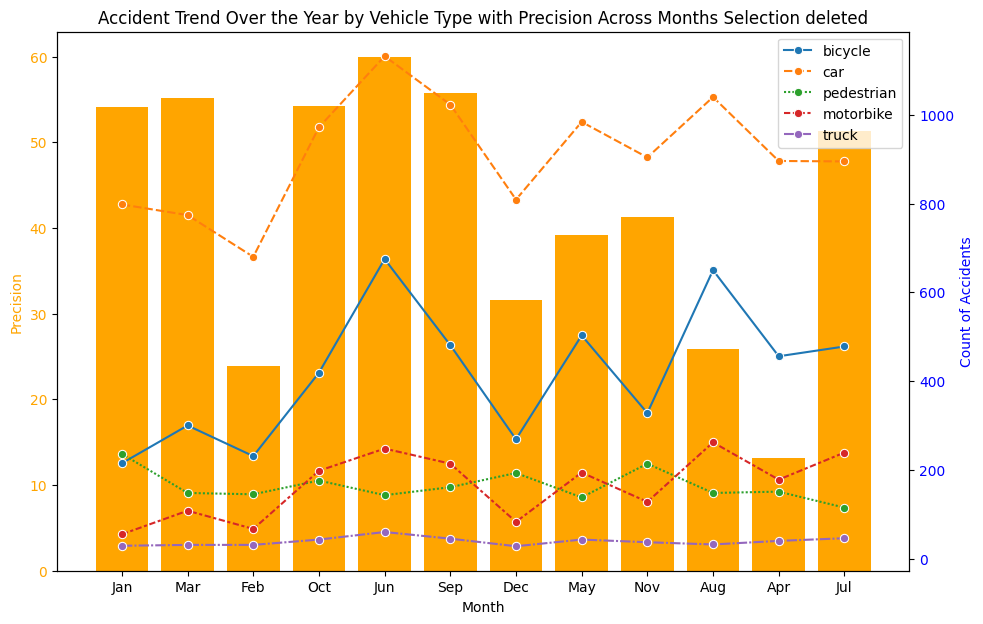

In [4]:
fig, ax1 = plt.subplots(figsize=(11, 7))

ax1.bar(df['month'], df['Precision'], color='orange')
ax1.set_xlabel('Month')
ax1.set_ylabel('Precision', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
monthly_accidents = df.groupby('month', observed=False).sum()
sns.lineplot(data=monthly_accidents[vehicles], marker='o', ax=ax2)
ax2.set_ylabel('Count of Accidents', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Accident Trend Over the Year by Vehicle Type with Precision Across Months Selection deleted')
plt.show()

Upon examining the graph above, it's clear that there is no direct correlation between the precision values from the weather dataset and the total number of road accidents involving different types of vehicles. This lack of correlation developed from the limited precision values available, as we only have 12 values for each month, making them insufficient for robust analysis. Consequently, I've opted to utilize road accidents as a reference point for analyzing the impact of weather conditions on the types of vehicles involved in road accidents.

### Q1. <u>Which road condition has the most impact on road accidents?</u>
To address this inquiry, I visualized a pie chart depicting the total number of accidents and their corresponding road conditions. The road conditions considered were 'dry' for sunny weather, 'icy' for snowy conditions, and 'wet' for rainy weather.

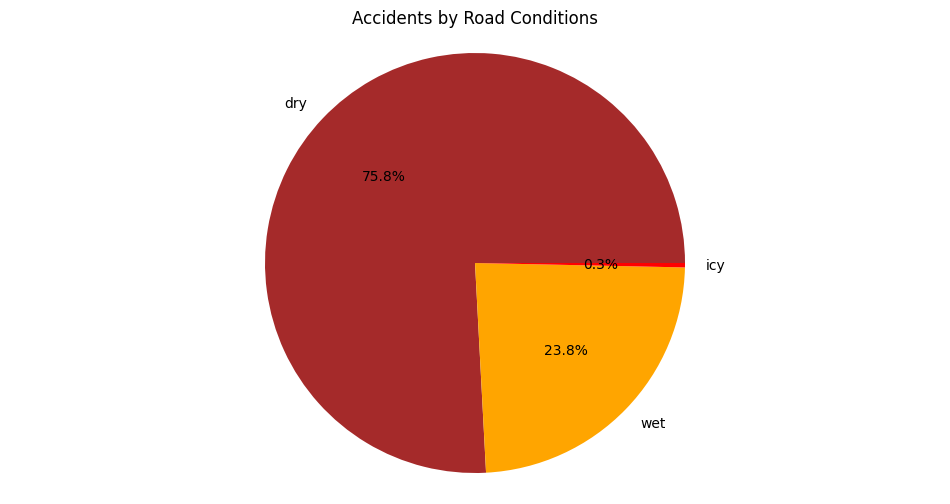

In [5]:
road_condition_counts = df['road condition'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(road_condition_counts, labels=road_condition_counts.index, autopct='%1.1f%%', colors=['brown', 'orange', 'red'])
plt.axis('equal')
plt.title('Accidents by Road Conditions')
plt.show()

### Inference from Question 1:
Analyzing the pie chart, it's evident that dry road conditions account for the majority, comprising 75.8% of the total accidents. Wet road conditions follow, contributing to 23.8% of the accidents, while icy conditions pose the least risk, constituting only 0.3% of the overall accident probability. This highlights the significant impact of weather conditions on road safety, with dry conditions being the most prevalent but also associated with a higher accident rate.

<hr>

### Q2. <u>Which type of vehicle is most likely to be involved in an accident?</u>
In addressing this question, I utilized a pie chart to visually represent the distribution of road accidents involving various types of vehicles. The chart provides a comprehensive overview by depicting the total number of accidents attributed to each vehicle category. This analysis offers valuable insights into the relative contribution of different vehicle types to overall road accidents, helping to identify potential areas of focus for safety measures and interventions.

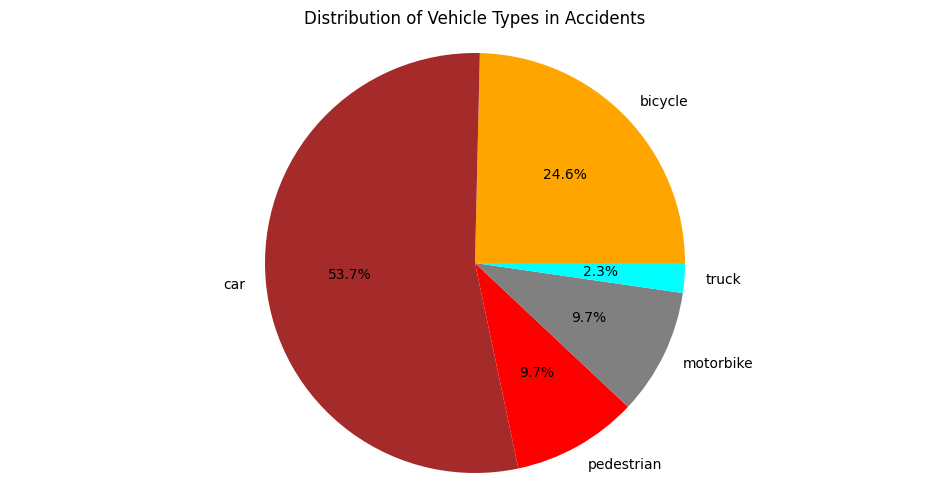

In [6]:
vehicle_counts = [df[vehicle].sum() for vehicle in vehicles]
plt.figure(figsize=(12, 6))
plt.pie(vehicle_counts, labels=vehicles, autopct='%1.1f%%', colors=['orange','brown', 'red', 'gray', 'cyan'])
plt.axis('equal')
plt.title('Distribution of Vehicle Types in Accidents')
plt.show()

### Inference from Question 2:
Analyzing the pie chart, it becomes evident that cars are the most frequently involved vehicle type in road accidents, constituting a significant probability of approximately 53.7%. Following closely, bicycles contribute to accidents with a probability of 24.6%. Pedestrians and motorbikes share a similar likelihood, both accounting for 9.7% of road accidents. Trucks have a lower probability of involvement, standing at 2.3%.
This breakdown provides a clear understanding of the distribution of road accidents among different vehicle types, emphasizing that the cars have the highest chances of getting involved in a road accident.

<hr>

### Q3. <u>How do different weather conditions impact the types of vehicles involved in accidents?</u>
To address this query, I generated three separate pie charts, each representing a distinct road condition. In each chart, I calculated the total occurrences of various vehicles involved in road accidents corresponding to the respective road conditions. This visual representation offers valuable insights into the impact of different road conditions on the distribution of accidents across various vehicle types.

By individually examining the pie charts for 'wet,' 'dry,' and 'icy' road conditions, one can understand the specific contributions of different vehicles in accidents under each condition. This analysis aids in understanding the relative impact of road conditions on various vehicle accidents, providing a better perspective for potential safety measures and interventions in specific scenarios.

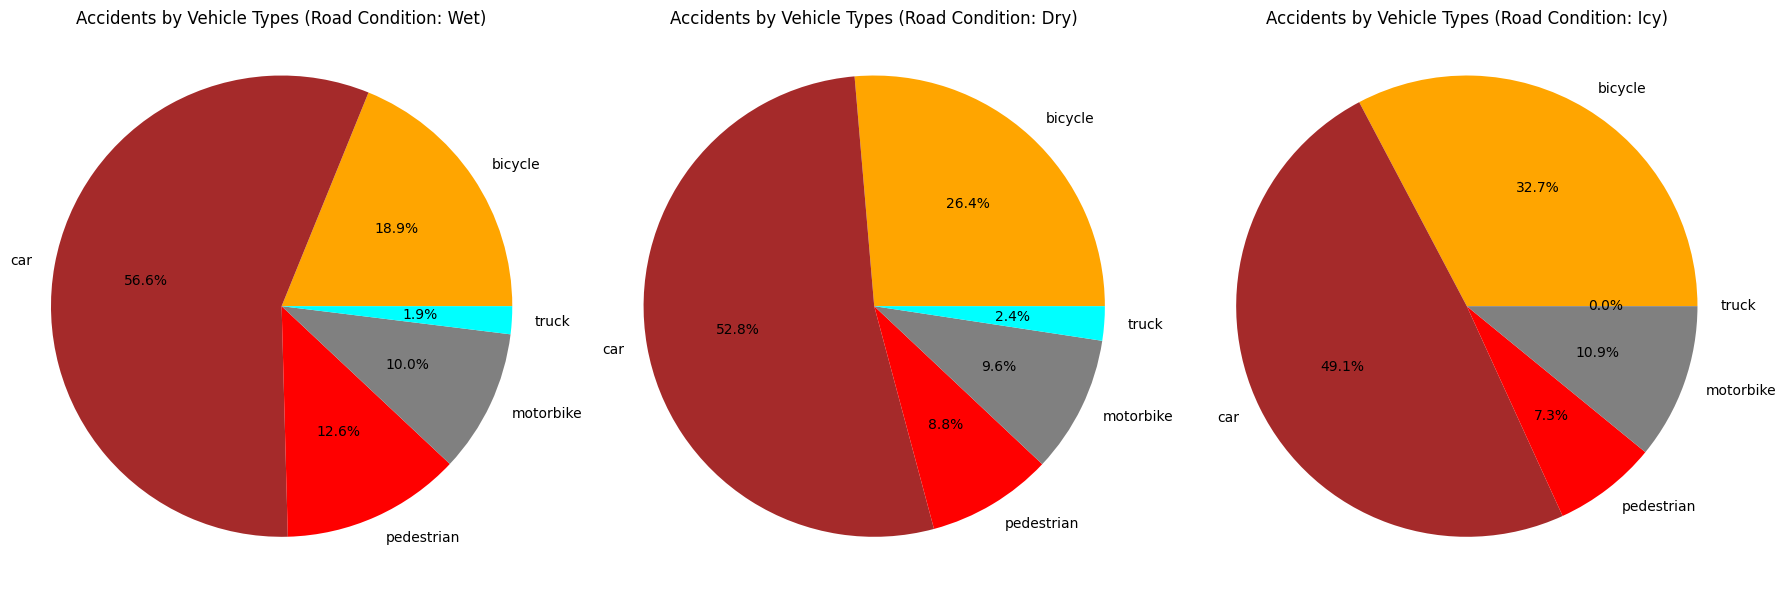

In [7]:
df_wet = df[df['road condition'] == 'wet']
df_dry = df[df['road condition'] == 'dry']
df_icy = df[df['road condition'] == 'icy']

vehicle_counts_wet = [df_wet[vehicle].sum() for vehicle in vehicles]
vehicle_counts_dry = [df_dry[vehicle].sum() for vehicle in vehicles]
vehicle_counts_icy = [df_icy[vehicle].sum() for vehicle in vehicles]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(vehicle_counts_wet, labels=vehicles, autopct='%1.1f%%', colors=['orange', 'brown', 'red', 'gray', 'cyan'])
axs[0].axis('equal')
axs[0].set_title('Accidents by Vehicle Types (Road Condition: Wet)')

axs[1].pie(vehicle_counts_dry, labels=vehicles, autopct='%1.1f%%', colors=['orange', 'brown', 'red', 'gray', 'cyan'])
axs[1].axis('equal')
axs[1].set_title('Accidents by Vehicle Types (Road Condition: Dry)')

axs[2].pie(vehicle_counts_icy, labels=vehicles, autopct='%1.1f%%', colors=['orange', 'brown', 'red', 'gray', 'cyan'])
axs[2].axis('equal')
axs[2].set_title('Accidents by Vehicle Types (Road Condition: Icy)')

plt.tight_layout()
plt.show()

### Inference from Question 3:

Analyzing the information conveyed by the three pie charts, it is evident that cars consistently emerge as the most prevalent vehicle involved in road accidents across different road conditions. The distribution reveals that wet road conditions contribute to 56.6% of car accidents, followed by 52.8% in dry conditions and 49.1% in icy conditions. This highlights that car accidents are more likely to happen in wet road conditions.

Bicycles represent the second-most common vehicle type in road accidents. Notably, icy road conditions pose the highest risk for bicycle accidents, accounting for approximately 32.7%, followed by dry conditions at 26.4% and wet conditions at 18.9%.

For pedestrians, the analysis indicates that wet road conditions present the highest probability of accidents, constituting approximately 12.6%. Dry conditions follow with 8.8%, and icy conditions exhibit a 7.3% likelihood of pedestrian accidents. This detailed plot enhances our understanding of the distinctive patterns in road accidents involving various vehicles across different road conditions.

<hr>

### Q4. <u>Is there any trend in vehicle accidents over the period of a year?</u>
To address this, I created a column chart displaying the months in descending order, aiming to identify the month with the highest number of accidents. Additionally, I explored potential weather patterns that could be inferred from the chart.

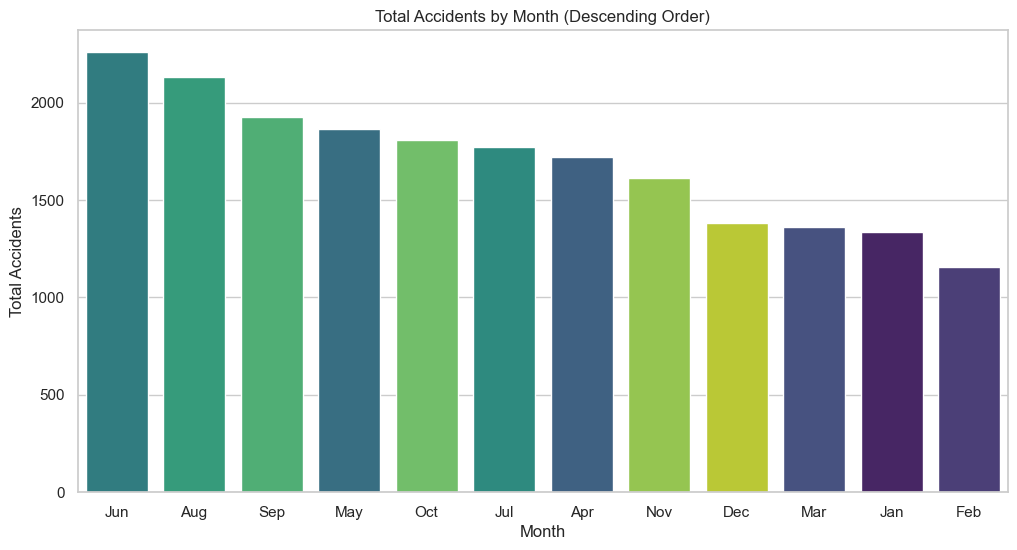

In [8]:
df['total_accidents'] = df[vehicles].sum(axis=1)
total_accidents_by_month = df.groupby('month',observed=False)['total_accidents'].sum().reset_index()
sorted_months = total_accidents_by_month.sort_values(by='total_accidents', ascending=False)['month']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_accidents', data=total_accidents_by_month, order=sorted_months,hue='month', palette='viridis')

plt.title('Total Accidents by Month (Descending Order)')
plt.xlabel('Month')
plt.ylabel('Total Accidents')
plt.show()

<div style="text-align: justify;">
Analyzing the column chart, it becomes evident that the summer months, spanning from June to September, exhibit the highest frequency of road accidents. In contrast, the winter months, ranging from December to March, showcase the lowest occurrence of road accidents. This observation suggests a potential correlation between seasonal variations and road accident frequencies, with summer posing a higher risk.</div>

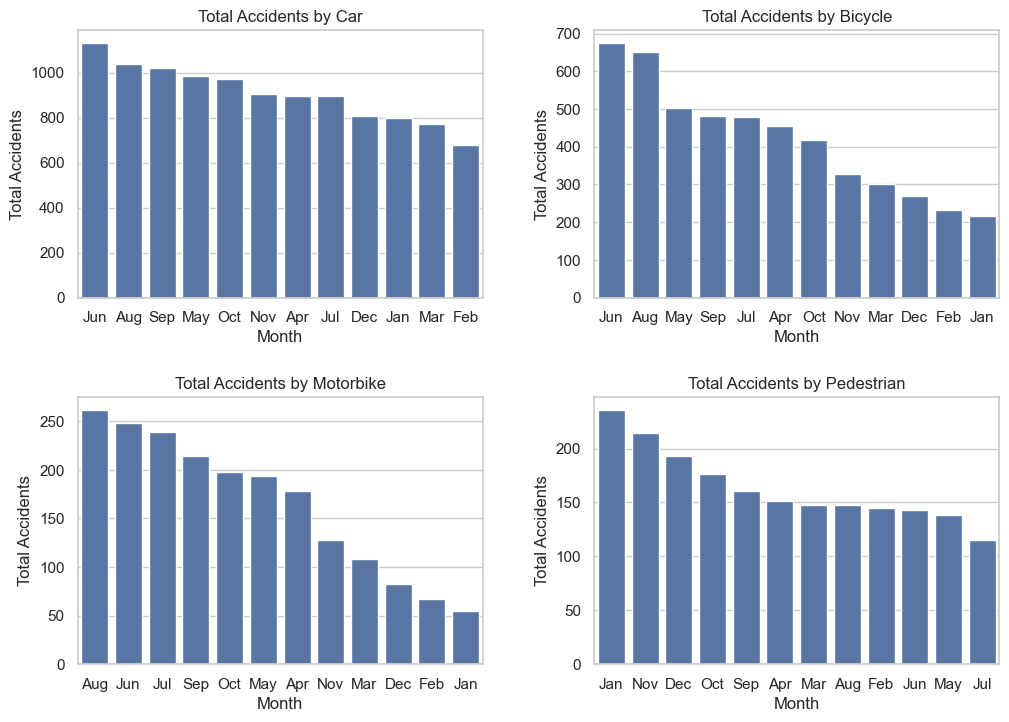

In [9]:
vehicle_types = ['car','bicycle','motorbike','pedestrian']
fig, axs = plt.subplots(2, 2, figsize=(11, 8))
fig.tight_layout(pad=4.0)
for i, ax in enumerate(axs.flatten()):
    if i < len(vehicle_types):
        vehicle_type = vehicle_types[i]
        accidents_by_month = df[df[vehicle_type] == 1].groupby('month', observed=False)[vehicle_type].sum().reset_index()
        sorted_months = accidents_by_month.sort_values(by=vehicle_type, ascending=False)['month']
        sns.barplot(x='month', y=vehicle_type, data=accidents_by_month, order=sorted_months, ax=ax)
        ax.set_title(f'Total Accidents by {vehicle_type.capitalize()}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Total Accidents')
plt.show()

### Inference from Question 4:
Analyzing the individual column charts for car, bicycle, motorbike, and pedestrian accidents, a consistent pattern emerges. 
<ul>
    <li>For car accidents, the summer months, spanning from June to October, pose the highest risk, while the winter months, from December to March, exhibit the least risk.</li>
    <li>A similar trend is observed for bicycle and motorbike accidents, with higher risks during the summer and lower risks in winter.</li>
    <li>However, for pedestrian accidents, the winter months from October to January present a higher risk, while the summer months from May to July are associated with lower risks.</li>
</ul>

This insight underscores the seasonal variations in accident frequencies across different modes of transportation.

## <b>5. Conclusion</b>
<hr>
In conclusion, the comprehensive analysis of road accidents involving various vehicle types and their correlation with different road conditions and months has provided valuable insights. The pie charts shed light on the distribution of accidents among different vehicle types, emphasizing the role of cars, bicycles, and pedestrians in such incidents. The distribution of accidents categorized by road conditions revealed a higher vulnerability of cars to wet environments and bicycles to icy conditions.

The examination of monthly trends revealed distinct patterns for different vehicle types, with the summer months consistently exhibiting higher risks. This data can help us focus on safety measures, especially considering the types of vehicles involved and the different road conditions and months. It highlights the importance of being proactive in addressing road safety, taking into account the various factors that contribute to accidents.

Overall, this analysis contributes to a better understanding of the dynamics of road accidents, enabling us to understand how the different months and road conditions affect the vehicles that get involved in a road accident.

## <b>6. Limitations</b>
<hr>

1. **Single-City Dataset:** The limitation of having the accident dataset for a single city implies that the findings and patterns observed may not be universally applicable to other locations with different traffic dynamics, infrastructure, and socio-economic factors. Road safety issues can vary significantly between cities, so generalizing findings to a broader context may not be accurate.

2. **Limited Time Frame:** The dataset covering only one year may restrict the ability to identify long-term trends or seasonal variations that could influence road accidents. A more extended timeframe would provide a more comprehensive understanding of patterns and fluctuations, allowing for better-informed decision-making and the planning of safety measures.

3. **Monthly Weather Data:** The availability of weather data only on a monthly basis rather than daily or hourly restricts the granularity of the analysis. Accidents may be influenced by specific weather conditions at different times of the day or week, and having more detailed weather data would enhance the accuracy of identifying correlations between road accidents and weather.

4. **Absence of Traffic Data:** The absence of traffic data is a significant limitation, as road accident patterns are closely tied to traffic density and flow. Understanding the relationship between accidents and varying traffic conditions, such as peak hours or traffic areas, is crucial for analysis. Without this information, the analysis may lack depth in identifying specific risk factors associated with traffic patterns.

### <u>Outlook for future work:</u>
To overcome the identified limitations and further advance our understanding of road accidents, future work should consider the following enhancements:

1. **Multi-City Data Integration:** Incorporating road accident data from multiple cities would provide a more diverse and representative sample, allowing for insights into regional variations in road safety.

2. **Extended Timeframe:** Extending the dataset's timeframe beyond a single year would enable the identification of long-term trends and patterns in road accidents.

3. **Detailed Weather Data:** Acquiring more detailed weather data, preferably on a daily or hourly basis, would offer a better analysis of the relationship between weather conditions and road accidents. This level of detail is crucial for capturing the impact of specific weather events and variations throughout the day.

4. **Inclusion of Traffic Data:** Integrating comprehensive traffic-related information, such as peak hours and traffic flow patterns, would provide valuable context for understanding road accidents. Analyzing the interplay between traffic conditions and accident rates can lead to more effective traffic management strategies and targeted safety measures.

By addressing these aspects in future work, we can enhance the robustness of the analysis and contribute to the development of more effective road safety policies and interventions.